# **Finding Duplicates **


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 162.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 129.6 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [ ]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of  JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
duplicate_rows=df.duplicated()
print (duplicate_rows.sum())

20


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [9]:
#  Find duplicates based on subset
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_mask = df.duplicated(subset=subset_cols, keep=False)
duplicates_df = df[duplicate_mask]

In [10]:
mainbranch_dist = duplicates_df['MainBranch'].value_counts()
employment_dist = duplicates_df['Employment'].value_counts()
remotework_dist = duplicates_df['RemoteWork'].value_counts()

In [12]:
# Print the results
print("Columns with same values in duplicate rows:")
print(duplicates_df)

print("\nDistribution of duplicates by MainBranch:")
print(mainbranch_dist)

print("\nDistribution of duplicates by Employment:")
print(employment_dist)

print("\nDistribution of duplicates by RemoteWork:")
print(remotework_dist)

Columns with same values in duplicate rows:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Unde

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


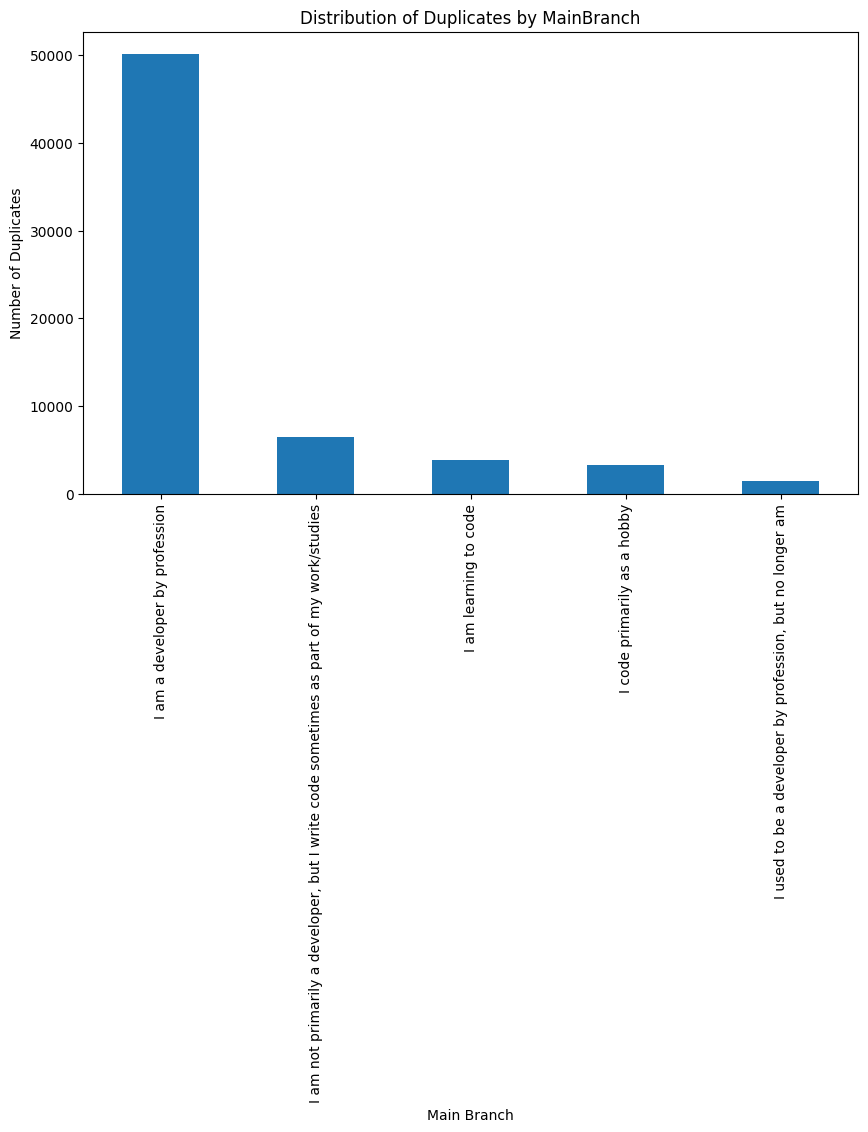

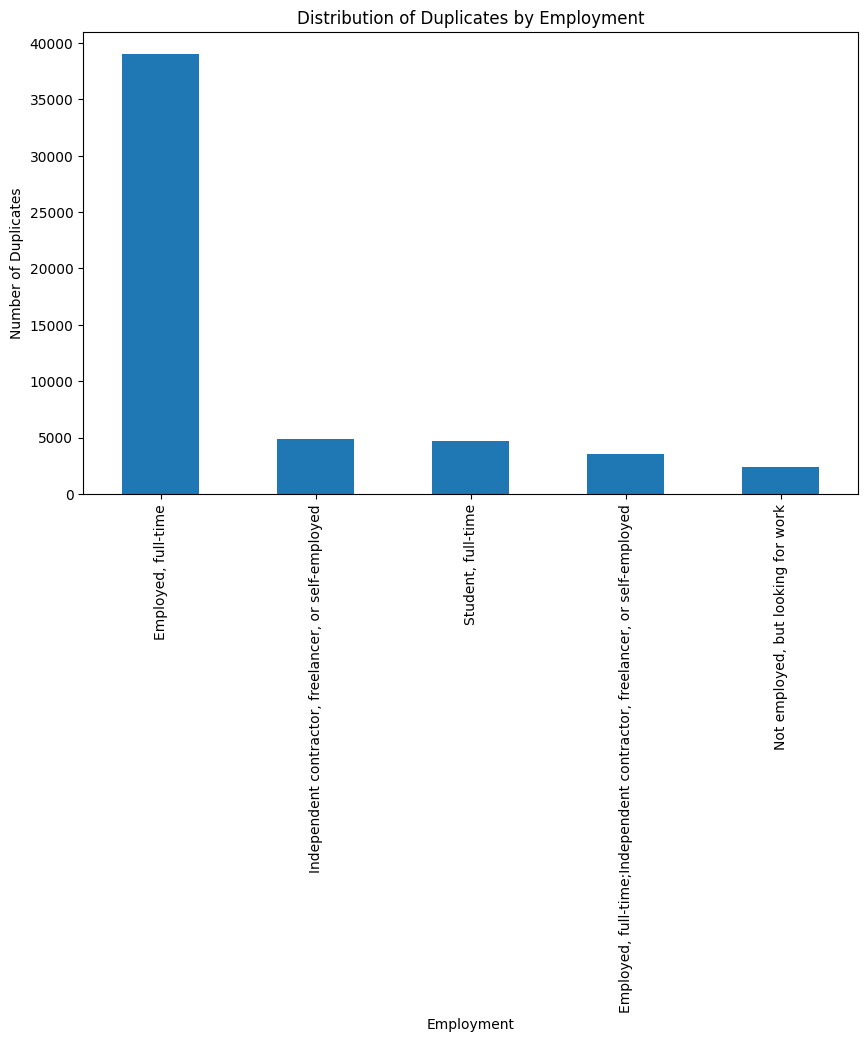

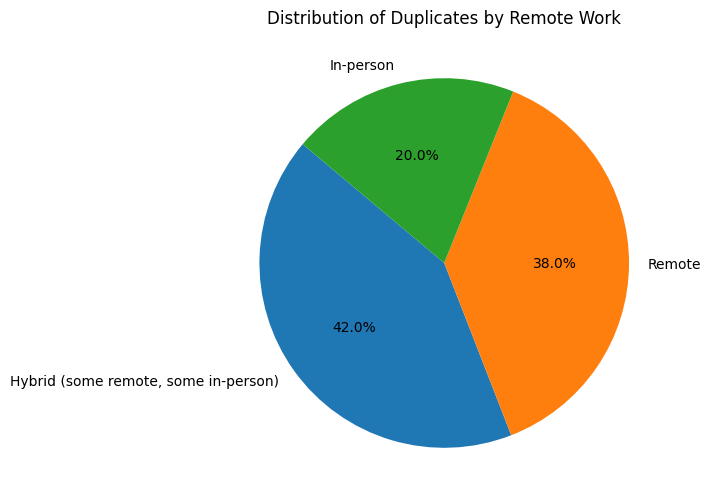

In [19]:
# Visualize distribution of duplicates by Main Branch using a bar chart
mainbranch_dist = duplicates_df['MainBranch'].value_counts()
plt.figure(figsize=(10, 6))
mainbranch_dist.plot(kind='bar')
plt.title('Distribution of Duplicates by MainBranch')
plt.xlabel('Main Branch')
plt.ylabel('Number of Duplicates')
plt.show()

# Visualize distribution of duplicates by Employment using a pie chart
employment_dist = duplicates_df['Employment'].value_counts().head(5)
plt.figure(figsize=(10, 6))
employment_dist.plot(kind='bar')
plt.title('Distribution of Duplicates by Employment')
plt.xlabel('Employment')
plt.ylabel('Number of Duplicates')
plt.show()

# Visualize distribution of duplicates by Remote Work using a pie chart
remotework_dist = duplicates_df['RemoteWork'].value_counts()
plt.figure(figsize=(10, 6))
remotework_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Duplicates by Remote Work')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()




In [26]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Distribution of duplicates by Main Branch and RemoteWork')

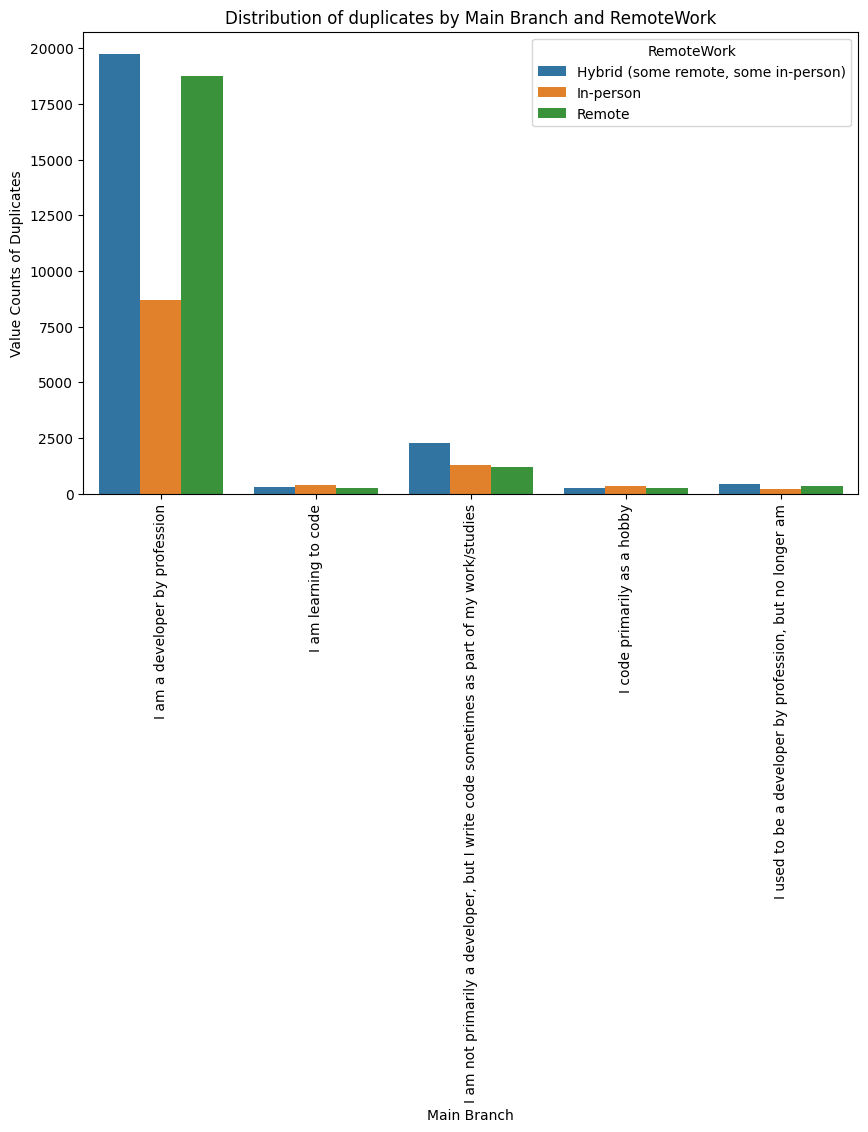

In [32]:
#Visualizing distribution of duplicates by Main Branch and Remotework.
branchwork_dist = duplicates_df.groupby(['MainBranch', 'RemoteWork']).size().reset_index(name='value_counts')
# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='MainBranch', y='value_counts', hue='RemoteWork', data=branchwork_dist)
plt.xticks(rotation=90)
plt.xlabel('Main Branch')
plt.ylabel('Value Counts of Duplicates')
plt.title('Distribution of duplicates by Main Branch and RemoteWork')

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [35]:
#keeps first occurence of duplicate
cleaned_df = df.drop_duplicates(subset=['MainBranch', 'Employment'], keep='first')
cleaned_df #removes duplicates based on dulpicates for both the columns. 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64237,64238,I am learning to code,55-64 years old,"Student, part-time;Retired",NaN,Apples,NaN,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64387,64388,"I used to be a developer by profession, but no...",25-34 years old,"Employed, full-time;Student, part-time;Employe...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Associate degree (A.A., A.S., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64403,64404,"I am not primarily a developer, but I write co...",35-44 years old,"Not employed, and not looking for work;Student...","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65172,65173,I am learning to code,35-44 years old,"Employed, full-time;Student, full-time;Employe...","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Schoo...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verify and Document Duplicate Removal Process


### Task 5: Documentation



*Step 1: Identify Duplicate Rows
First, we counted the number of duplicate rows in the dataset to understand the extent of duplication. We also displayed a few of the duplicate rows to get an insight into their structure.

Step 2: Analyze Characteristics of Duplicates
Next, we analyzed which columns had the same values in the duplicate rows. Additionally, we examined the distribution of duplicates across different columns like MainBranch, Employment, and RemoteWork.

Step 3: Visualize Duplicates Distribution
We created visualizations to show the distribution of duplicates across different categories. Bar charts and pie charts were used to represent the distribution of duplicates by MainBranch, Employment, and RemoteWork.
Step 4: Strategic Removal of Duplicates
Deciding which columns were critical for defining uniqueness in the dataset, we removed duplicates based on a subset of columns. This helped in retaining unique entries in the dataset.*



*By strategically identifying and removing duplicates, we cleaned the dataset, ensuring that it only contains unique entries based on key columns. This step is crucial for maintaining the integrity and accuracy of our data analysis.


When deciding which columns to use for identifying and removing duplicates, it’s essential to select rows that uniquely identify each record or are critical to the analysis. By selecting these specific columns, the goal was to maintain the uniqueness of each respondent while ensuring that duplicates are identified and removed accurately.*

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
